In [1]:
import pandas as pd

df=pd.read_csv('train.csv')
df.head()

,DATETIME,SERVER,CPU,CPULOAD
0,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-0,3.88
1,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-1,11.33
2,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-10,5.31
3,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-11,5.25
4,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-12,0.28


In [2]:
df.shape

(312696, 4)

In [3]:
#DETECTING OUTLIERS PER CPU
server_list = df['SERVER'].unique()
cpu_list = df['CPU'].unique()
outlier_indices = []

for server in server_list:
    for cpu in cpu_list:
        data_subset = df[(df['CPU'] == cpu) & (df['SERVER'] == server)]
        q1 = data_subset['CPULOAD'].quantile(0.25)
        q3 = data_subset['CPULOAD'].quantile(0.75)

        cpu_iqr = q3 - q1
        upper = q3 + (1.5 * cpu_iqr)
        lower = q1 - (1.5 * cpu_iqr)

        outliers = data_subset[(data_subset['CPULOAD'] > upper) | (data_subset['CPULOAD'] < lower)]
        outlier_indices.extend(outliers.index.tolist())

In [4]:
#FILTERING OUT OUTLIERS
df = df[~df.index.isin(outlier_indices)]
df.head()

,DATETIME,SERVER,CPU,CPULOAD
0,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-0,3.88
1,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-1,11.33
2,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-10,5.31
3,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-11,5.25
4,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-12,0.28


In [5]:
df.shape

(307716, 4)

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
df['DATETIME']=pd.to_datetime(df['DATETIME'])
decomp_results=seasonal_decompose(df['CPULOAD'], period=96)
type(decomp_results)

statsmodels.tsa.seasonal.DecomposeResult

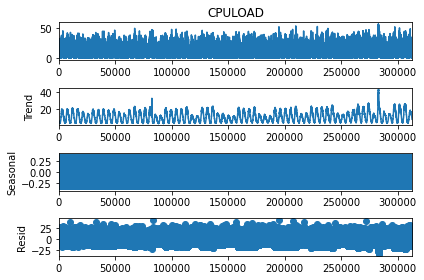

In [7]:
import matplotlib.pyplot as plt
decomp_results.plot()
plt.show()

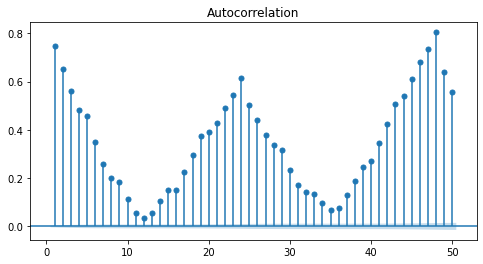

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
#ACF
fig, ax = plt.subplots(1,1, figsize=(8,4))
plot_acf(df['CPULOAD'], ax=ax, lags=50, zero=False)
plt.show()

# Period of 24 steps = SEASONAL ORDER S
S=24

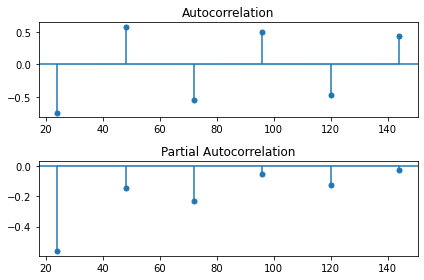

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

#Data is relatively constant, no trend upwards or downwards, only taking seasonal diff(?)

df_diff=df['CPULOAD'].diff(S).dropna()

lags24 = [24, 48, 72, 96, 120, 144]
lags48 = lags24*2

fig, (ax1, ax2) = plt.subplots(2,1)

#seasonal ACF
plot_acf(df_diff, lags=lags24, ax=ax1,  alpha=0.05)

#seasonal PACF
plot_pacf(df_diff, lags=lags24, ax=ax2,  alpha=0.05)

fig.tight_layout()
plt.show()

#pacf cuts off at P -> AR
#acf cuts off at Q -> MA
#Both tail off, an ARMA model

#Here pacf cuts off at P=48, Q=0

In [10]:
df.reset_index( inplace=True)
df = df.set_index('DATETIME')
df.shape

(307716, 4)

In [11]:
df_a=df.drop_duplicates()
df_a.shape

(307716, 4)

In [12]:
#df[df.index.duplicated()]

In [13]:
df.head()

,index,SERVER,CPU,CPULOAD
DATETIME,,,,
2020-03-24 00:00:00+03:00,0,CIHAZ_301,CPU-0,3.88
2020-03-24 00:00:00+03:00,1,CIHAZ_301,CPU-1,11.33
2020-03-24 00:00:00+03:00,2,CIHAZ_301,CPU-10,5.31
2020-03-24 00:00:00+03:00,3,CIHAZ_301,CPU-11,5.25
2020-03-24 00:00:00+03:00,4,CIHAZ_301,CPU-12,0.28


In [14]:
df0=df.loc[(df['SERVER']=='CIHAZ_301') & (df['CPU'] == 'CPU-0'), :]
pd.to_datetime(df0.index)
df0.head()

,index,SERVER,CPU,CPULOAD
DATETIME,,,,
2020-03-24 00:00:00+03:00,0,CIHAZ_301,CPU-0,3.88
2020-03-24 00:15:00+03:00,48,CIHAZ_301,CPU-0,3.92
2020-03-24 00:30:00+03:00,96,CIHAZ_301,CPU-0,3.62
2020-03-24 00:45:00+03:00,144,CIHAZ_301,CPU-0,3.07
2020-03-24 01:00:00+03:00,192,CIHAZ_301,CPU-0,3.11


In [15]:
df0.asfreq('15T')
df0.asfreq(freq ='15T')
df0.index

DatetimeIndex(['2020-03-24 00:00:00+03:00', '2020-03-24 00:15:00+03:00',
               '2020-03-24 00:30:00+03:00', '2020-03-24 00:45:00+03:00',
               '2020-03-24 01:00:00+03:00', '2020-03-24 01:15:00+03:00',
               '2020-03-24 01:30:00+03:00', '2020-03-24 01:45:00+03:00',
               '2020-03-24 02:00:00+03:00', '2020-03-24 02:15:00+03:00',
               ...
               '2020-05-30 21:30:00+03:00', '2020-05-30 21:45:00+03:00',
               '2020-05-30 22:00:00+03:00', '2020-05-30 22:15:00+03:00',
               '2020-05-30 22:30:00+03:00', '2020-05-30 22:45:00+03:00',
               '2020-05-30 23:00:00+03:00', '2020-05-30 23:15:00+03:00',
               '2020-05-30 23:30:00+03:00', '2020-05-30 23:45:00+03:00'],
              dtype='datetime64[ns, pytz.FixedOffset(180)]', name='DATETIME', length=6350, freq=None)

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

import pmdarima as pm

#My data is stationary so i didnt take first difference and thats why non-seasonal AR MA values are 0. 
#For seasonal AR and MA pacf cuts off so AR value is 48 while MA tails off so i gave it a 0.

In [17]:
results=pm.auto_arima(df0['CPULOAD'], seasonal=True, m=24, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

print(results.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=28844.109, Time=22.44 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=29859.093, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=29081.628, Time=1.62 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=28891.174, Time=1.92 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=29857.093, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=28843.265, Time=13.87 sec
 ARIMA(2,1,2)(0,0,0)[24] intercept   : AIC=28841.452, Time=3.20 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=28843.280, Time=15.72 sec
 ARIMA(1,1,2)(0,0,0)[24] intercept   : AIC=28853.315, Time=2.96 sec
 ARIMA(2,1,1)(0,0,0)[24] intercept   : AIC=28877.233, Time=0.91 sec
 ARIMA(3,1,2)(0,0,0)[24] intercept   : AIC=28840.016, Time=4.46 sec
 ARIMA(3,1,2)(1,0,0)[24] intercept   : AIC=28841.856, Time=17.20 sec
 ARIMA(3,1,2)(0,0,1)[24] intercept   : AIC=28841.842, Time=15.66 sec
 ARIMA(3,1,2)(1,0,1)[24] intercept   : AIC=28842.731, Time=26.86 sec

In [22]:
#server_list = df['SERVER'].unique()
#cpu_list = df['CPU'].unique()
mean_cpuload = df.groupby('SERVER')['CPULOAD'].mean()

sarima_models={}

for server in mean_cpuload.index:
        data_subset=df.loc[(df['SERVER']==server)]['CPULOAD']
        model = SARIMAX(data_subset, order=(4,1,2), seasonal_order=(0,0,0,24))
        results=model.fit()
        sarima_models[server] = results
        print(server)

C:\Users\FatihS\anaconda3\anaconda_yeni\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\FatihS\anaconda3\anaconda_yeni\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\FatihS\anaconda3\anaconda_yeni\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


CIHAZ_301


C:\Users\FatihS\anaconda3\anaconda_yeni\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\FatihS\anaconda3\anaconda_yeni\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


CIHAZ_305


In [23]:
test_set=pd.read_csv('test.csv')

test_set = test_set.set_index('DATETIME')

In [24]:
pd.to_datetime(test_set.index)

DatetimeIndex(['2020-05-31 00:00:00+03:00', '2020-05-31 00:00:00+03:00',
               '2020-05-31 00:15:00+03:00', '2020-05-31 00:15:00+03:00',
               '2020-05-31 00:30:00+03:00', '2020-05-31 00:30:00+03:00',
               '2020-05-31 00:45:00+03:00', '2020-05-31 00:45:00+03:00',
               '2020-05-31 01:00:00+03:00', '2020-05-31 01:00:00+03:00',
               ...
               '2020-05-31 22:45:00+03:00', '2020-05-31 22:45:00+03:00',
               '2020-05-31 23:00:00+03:00', '2020-05-31 23:00:00+03:00',
               '2020-05-31 23:15:00+03:00', '2020-05-31 23:15:00+03:00',
               '2020-05-31 23:30:00+03:00', '2020-05-31 23:30:00+03:00',
               '2020-05-31 23:45:00+03:00', '2020-05-31 23:45:00+03:00'],
              dtype='datetime64[ns, pytz.FixedOffset(180)]', name='DATETIME', length=192, freq=None)

In [25]:
test_set.columns

Index(['index', 'SERVER'], dtype='object')

In [26]:
test_set.shape

(192, 2)

In [49]:
predicted_cpuload = pd.DataFrame(index=test_set.index)

for server in mean_cpuload.index:
    model_fit = sarima_models[server]
    server_test_data = test_set[test_set['SERVER'] == server]
    predictions = model_fit.predict(start=server_test_data.index[0], end=server_test_data.index[-1])
    predicted_cpuload.loc[server_test_data.index, 'CPULOAD'] = predictions

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
predicted_cpuload['server'] = test_set['server']

In [ ]:
predicted_cpu.to_csv('predicted_set.csv')